<a href="https://colab.research.google.com/github/CardiacModelling/summer-school-2025/blob/main/Myokit_installation_and_example_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Myokit installation and example simulation

In this notebook, we
- install [Myokit](https://myokit.org) in Google Colab
- run an example simulation
- explain the example, with links to the [docs](https://myokit.readthedocs.io/en/stable/)

To install Myokit, we
1. Use `apt-get` to install the required [Sundials](https://computing.llnl.gov/projects/sundials) library
2. Use `pip` to install the package `myokit`

In [1]:
!apt-get install libsundials-dev
!pip install myokit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsundials-dev is already the newest version (5.8.0+dfsg-1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


Next, we import `myokit` module and make our first call:

In [2]:
import myokit
print(myokit.version())


 Myokit 1.38.0 |/\
_______________|  |_____


That works! For the real test, we'll load the built-in example model and run a 1000ms simulation:

In [3]:
m, p, _ = myokit.load('example')
s = myokit.Simulation(m, p)
d = s.run(1000)

INFO:root:running build_ext
INFO:root:building 'myokit_sim_1_4750590111166654822' extension
INFO:root:creating build/temp.linux-x86_64-cpython-312/tmp/tmpkcuf6i69myokit
INFO:root:x86_64-linux-gnu-gcc -fno-strict-overflow -Wsign-compare -DNDEBUG -g -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/include -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/include/python3.12 -c /tmp/tmpkcuf6i69myokit/source.c -o build/temp.linux-x86_64-cpython-312/tmp/tmpkcuf6i69myokit/source.o
INFO:root:creating build/lib.linux-x86_64-cpython-312
INFO:root:x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-312/tmp/tmpkcuf6i69myokit/source.o -L/usr/local/lib -L/usr/local/lib64 -L/usr/lib/x86_64-linux-gnu -Wl,--enable-new-dtags,-rpath,/usr/local/lib -Wl,--enable-new-dtags,-rpath,/usr/local/lib64 -lsundials_

To visualise the results, we'll use [matplotlib](https://matplotlib.org/):

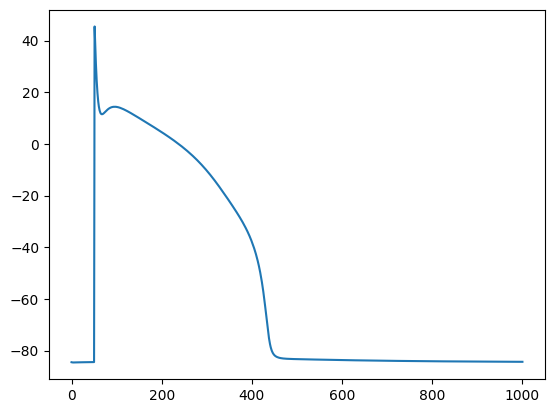

In [4]:
import matplotlib.pyplot as plt
plt.plot(d.time(), d['membrane.V'])
plt.show()

## Tweak: get rid of the logging info

When we created the simulation, it generated a lot of debug output:
```
INFO:root:running build_ext
INFO:root:building 'myokit_sim_1_5499951616817020280' extension
INFO:root:creating build/temp.linux-x86_64-cpython-312/tmp/tmpxss9t8mumyokit
INFO:root:x86_64-linux-gnu-gcc -fno-strict-overflow -Wsign-compare -DNDEBUG -g -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/include -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/local/lib/python3.12/dist-packages/myokit/_sim -I/usr/include/python3.12 -c /tmp/tmpxss9t8mumyokit/source.c -o build/temp.linux-x86_64-cpython-312/tmp/tmpxss9t8mumyokit/source.o
INFO:root:creating build/lib.linux-x86_64-cpython-312
INFO:root:x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-312/tmp/tmpxss9t8mumyokit/source.o -L/usr/local/lib -L/usr/local/lib64 -L/usr/lib/x86_64-linux-gnu -Wl,--enable-new-dtags,-rpath,/usr/local/lib -Wl,--enable-new-dtags,-rpath,/usr/local/lib64 -lsundials_cvodes -lsundials_nvecserial -lm -o build/lib.linux-x86_64-cpython-312/myokit_sim_1_5499951616817020280.cpython-312-x86_64-linux-gnu.so
INFO:root:copying build/lib.linux-x86_64-cpython-312/myokit_sim_1_5499951616817020280.cpython-312-x86_64-linux-gnu.so ->
```
This doesn't really help us much, and can look a bit daunting.
We can get rid of them with:

In [5]:
import logging
logging.disable(logging.INFO)

Now we can run the same example without seeing the debug output:

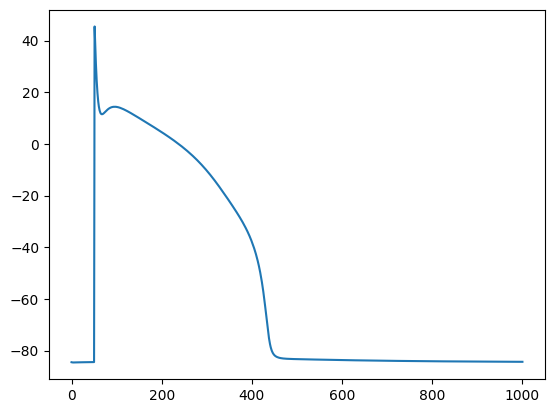

In [6]:
m, p, x = myokit.load('example')
s = myokit.Simulation(m, p)
d = s.run(1000)

plt.plot(d.time(), d['membrane.V'])
plt.show()

## The same example, line by line

If you'd like a bit more insight into what we just did, we'll now run through the same example code more slowly, explaining each line.

In [ ]:
m, p, x = myokit.load('example')

First, we loaded a [Model](https://myokit.readthedocs.io/en/stable/api_core/Model.html), a [Pacing protocol](https://myokit.readthedocs.io/en/stable/api_simulations/Protocol.html), and a script.

Instead of using this built-in example, we can download a model from


Usually, we'd load these from an `.mmt` file, for example
```
m, p, x = myokit.load('my-model.mmt')
```
but here we used a built-in file called `example` instead.

The model contains all the equations that make up the cell or channel model. To

In [11]:
!wget https://raw.github.com/myokit/models/main/c/tentusscher-2006.mmt


--2025-10-03 10:24:11--  https://raw.github.com/myokit/models/main/c/tentusscher-2006.mmt
Resolving raw.github.com (raw.github.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/myokit/models/main/c/tentusscher-2006.mmt [following]
--2025-10-03 10:24:11--  https://raw.githubusercontent.com/myokit/models/main/c/tentusscher-2006.mmt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13941 (14K) [text/plain]
Saving to: ‘tentusscher-2006.mmt’

tentusscher-2006.mm 100%[===================>]  13.61K  --.-KB/s    in 0.001s  

2025-10-03 10:24:11 (10.0 MB/s) - ‘tentusscher-

In [12]:
m, p, x = myokit.load('tentusscher-2006.mmt')